In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
# only want first 15 columns from arrhythmia data set
heart = pd.read_csv('arrhythmia.data', header=None)
heart = heart[heart.columns[:15]]

In [3]:
# got column names from .names file:
heart.columns = ["age", "sex", "height", "weight", "QRS_duration", "PR_interval", "Q-T_interval", "T_interval", "P_interval", "QRS", "T", "P", "QRST", "J", "heart_rate"]

heart.head(10)

# source: https://www.geeksforgeeks.org/add-column-names-to-dataframe-in-pandas/

,age,sex,height,weight,QRS_duration,PR_interval,Q-T_interval,T_interval,P_interval,QRS,T,P,QRST,J,heart_rate
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71
4,75,0,190,80,88,181,360,177,103,-16,13,61,3,?,?
5,13,0,169,51,100,167,321,174,91,107,66,52,88,?,84
6,40,1,160,52,77,129,377,133,77,77,49,75,65,?,70
7,49,1,162,54,78,0,376,157,70,67,7,8,51,?,67
8,44,0,168,56,84,118,354,160,63,61,69,78,66,84,64
9,50,1,167,67,89,130,383,156,73,85,34,70,71,?,63


In [4]:
# Want to use only variables that are on the same scale. Will look at durations and intervals, which are all in msec.
df = heart[['QRS_duration','PR_interval', 'Q-T_interval', 'T_interval', 'P_interval']]

# drop observations w missing data

df = df.replace({'?':np.nan}).dropna()

# source: https://stackoverflow.com/questions/46269915/delete-all-rows-from-a-dataframe-containing-question-marks

df.head(10)

,QRS_duration,PR_interval,Q-T_interval,T_interval,P_interval
0,91,193,371,174,121
1,81,174,401,149,39
2,138,163,386,185,102
3,100,202,380,179,143
4,88,181,360,177,103
5,100,167,321,174,91
6,77,129,377,133,77
7,78,0,376,157,70
8,84,118,354,160,63
9,89,130,383,156,73


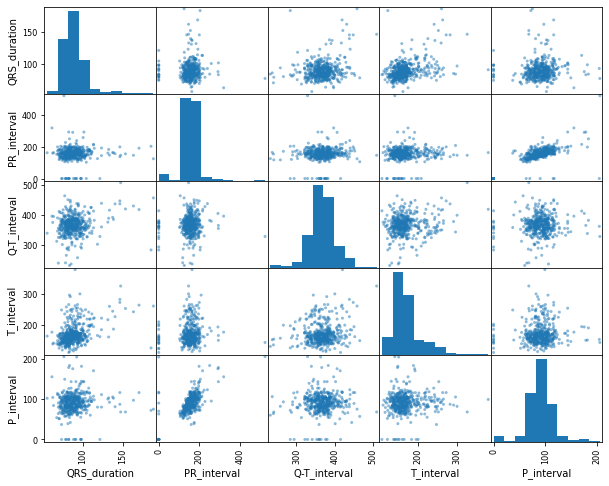

In [5]:
# look at all pairwise relationships among the variables in the data set. No super obvious clusters...
ax = pd.plotting.scatter_matrix(df, figsize=(10,8))
# None really look like multiple groups...

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


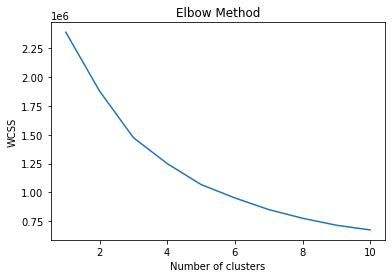

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# per elbow method, looks like 3 clusters - very faint inflection point in the line.
# I tried range(1,20) to see if I would end up with the 16 categories in the data set, but that did not pan out.

#### Trying to find a good plot...

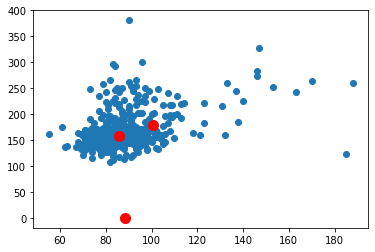

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter((df["QRS_duration"]), (df["T_interval"]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

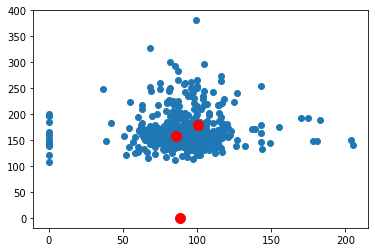

In [12]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter((df["P_interval"]), (df["T_interval"]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

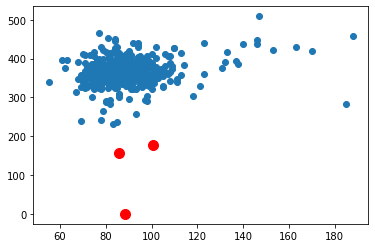

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter((df["QRS_duration"]), (df["Q-T_interval"]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()

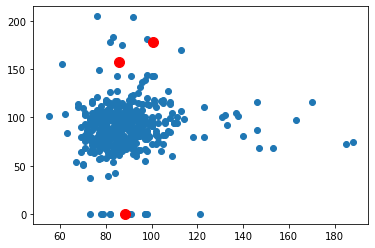

In [15]:
#Still not great but the best one I've found!
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
plt.scatter((df["QRS_duration"]), (df["P_interval"]))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.show()